In [3]:
# requirements.txt
# Input : List of Lists of elements (columns)
# Output : List of Lists of elements (columns) with the same elements grouped together
# example : [[1,2],[2,3],[4,5]] -> [[1,2,3],[4,5]]
def merge_groups(lists):
    merged = []
    
    while lists:
        # Take the first list
        first, *rest = lists
        first = set(first)

        lf = -1
        while len(first) > lf:
            lf = len(first)
            
            rest2 = []
            for r in rest:
                if first.intersection(r):
                    first |= set(r)
                else:
                    rest2.append(r)
            rest = rest2

        merged.append(list(first))
        lists = rest
    return merged
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
# Outlier cleaning

In [5]:
# Load the data
df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
df_X=df.drop(columns=['Bankrupt?'],axis=1)
df_Y=df['Bankrupt?']

# normalize the data_X
scaler = StandardScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

In [6]:
df_X

ROA(C) before interest and depreciation before interest  \
0                                             -2.217909         
1                                             -0.673828         
2                                             -1.303672         
3                                             -1.735886         
4                                             -0.661778         
...                                                 ...         
6814                                          -0.189395         
6815                                          -0.494676         
6816                                          -0.534845         
6817                                           0.017875         
6818                                          -0.199839         

      ROA(A) before interest and % after tax  \
0                                  -2.045798   
1                                  -0.311068   
2                                  -0.908420   
3                                  -1.636209   
4                                  -0.307745   
...                                      ...   
6814                               -0.291959   
6815                               -0.310237   
6816                               -0.379194   
6817                                0.019594   
6818                                0.174956   

      ROA(B) before interest and depreciation after tax  \
0                                             -2.400361   
1                                             -0.598450   
2                                             -1.319910   
3                                             -1.556340   
4                                             -0.508050   
...                                                 ...   
6814                                          -0.168181   
6815                                          -0.477627   
6816                                          -0.534996   
6817                                           0.007403   
6818                                          -0.065612   

      Operating Gross Margin  Realized Sales Gross Margin  \
0                  -0.383334                    -0.382638   
1                   0.135068                     0.136307   
2                  -0.383759                    -0.388177   
3                  -1.441418                    -1.441832   
4                  -0.541238                    -0.540708   
...                      ...                          ...   
6814               -0.206277                    -0.204969   
6815               -0.569328                    -0.568828   
6816                0.147411                     0.135029   
6817               -0.005811                    -0.004720   
6818                1.149313                     1.151617   

      Operating Profit Rate  Pre-tax net Interest Rate  \
0                  0.016456                  -0.023516   
1                  0.014671                   0.014799   
2                  0.007858                  -0.061111   
3                 -0.004257                  -0.017313   
4                  0.016758                   0.013703   
...                     ...                        ...   
6814               0.018215                   0.017036   
6815               0.018223                   0.017455   
6816               0.017628                   0.016412   
6817               0.024494                   0.024099   
6818              -0.051874                   0.372776   

      After-tax net Interest Rate  \
0                       -0.020165   
1                        0.015966   
2                       -0.051183   
3                       -0.008676   
4                        0.016186   
...                           ...   
6814                     0.018197   
6815                     0.017919   
6816                     0.017153   
6817                     0.023223   
6818                     0.346771   

      Non-industry income and expenditure/revenue  \
0          

In [7]:
# Data hunt for outliers

# Check for outliers in the data

# manual inspection of the data 

# apparent outliers in the data

# Operating Gross Margin 
print(df["Operating Gross Margin"].idxmax())  # max and min values
print(df["Operating Gross Margin"].idxmin())


# Operating Gross margin and Realized sales Gross Margin are the same columns (nearly)
# -> drop realized sales Gross margin
df["Realized Sales Gross Margin"]
# lines 2490 / 2411 -> are outliers




    

2411
2490


0       0.601457
1       0.610235
2       0.601364
3       0.583541
4       0.598783
          ...   
6814    0.604462
6815    0.598308
6816    0.610213
6817    0.607850
6818    0.627409
Name: Realized Sales Gross Margin, Length: 6819, dtype: float64

In [8]:
#df_X.drop([2411,2490])
#df_X.drop(["Realized Sales Gross Margin"],axis=1)



In [9]:
# Normalized the data
# removed all features with and IQR < 0.1

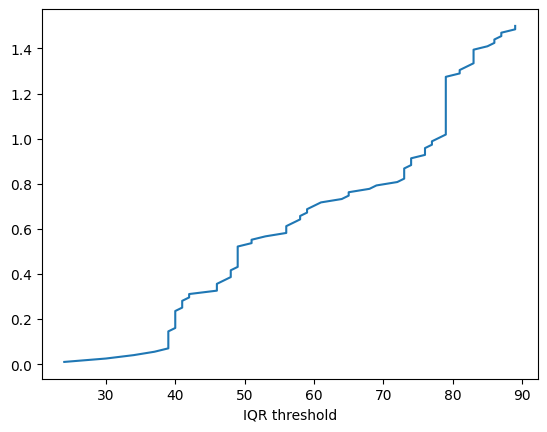

In [10]:
# successive values of IQR threshold
iqr_thresholds = np.linspace(0.01, 1.5, 100)
#iqr_thresholds=[0.1]
n_features = []
for iqr_threshold in iqr_thresholds:
    iqr = df_X.quantile(0.75) - df_X.quantile(0.25)
    iqr = iqr[iqr < iqr_threshold]
    n_features.append(len(iqr))
    
plt.plot (n_features,iqr_thresholds)
plt.xlabel("IQR threshold")
plt.show()

In [11]:
# résultat : 
iqr_threshold=0.07
iqr = df_X.quantile(0.75) - df_X.quantile(0.25)
iqr = iqr[iqr < iqr_threshold]
print("number of columns to drop with 0.07 iqr threshhold",len(iqr))
print(iqr.index.values.tolist())
list_of_columns_to_drop = iqr.index.values.tolist()
df_X = df_X.drop(columns=list_of_columns_to_drop)

number of columns to drop with 0.07 iqr threshhold 39
['Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Long-term fund suitability ratio (A)', 'Contingent liabilities/Net worth', 'Accounts Receivable Turnover', 'Average Collection Days', 'Fixed Assets Turnover Frequency', 'Revenue per person', 'Allocation rate per person', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Inventory/Working Capital', 'Inventory/Current Liability', 'Long-term Liability to Cur

In [12]:
df_X.shape

(6819, 54)

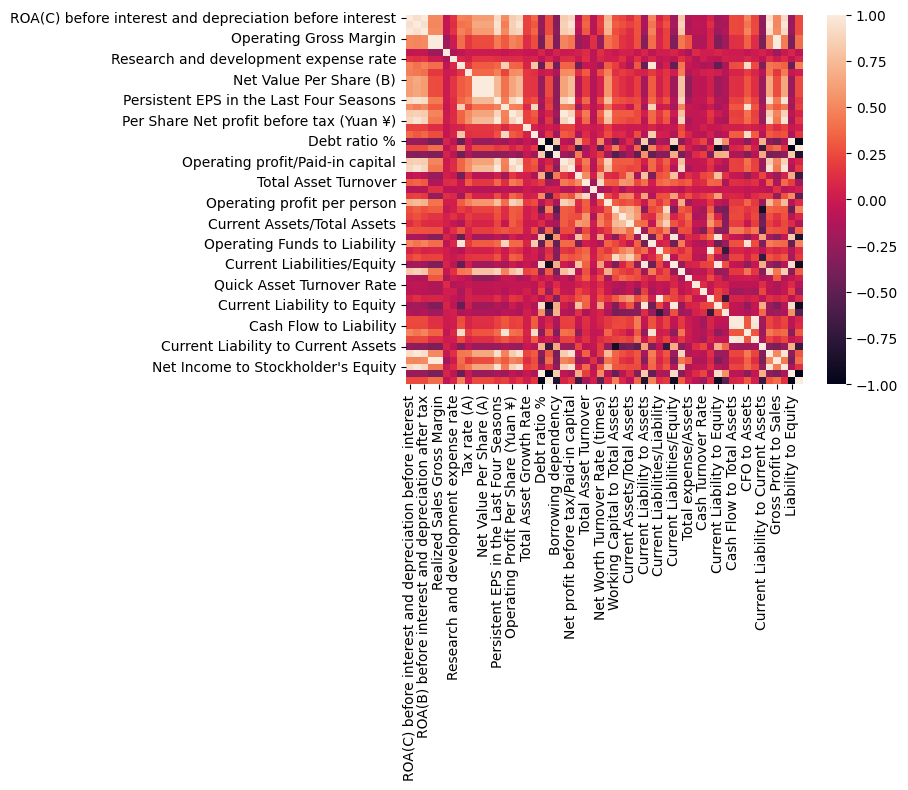

In [13]:
df_X.corr()
sns.heatmap(df_X.corr('spearman'))
plt.show()

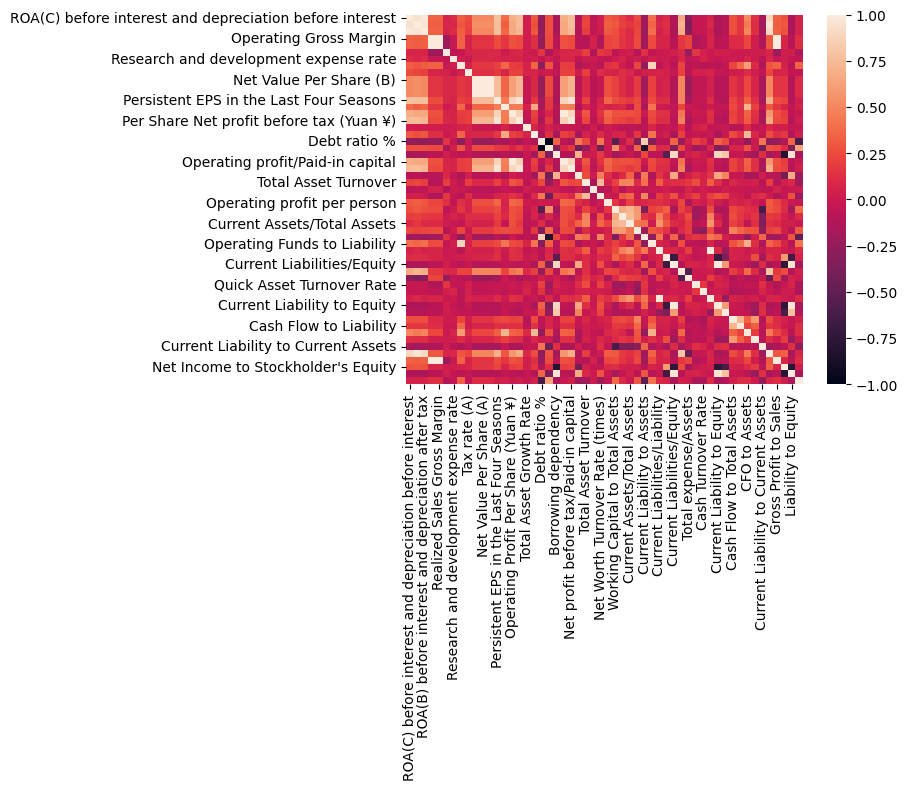

In [14]:
df_X.corr()
sns.heatmap(df_X.corr('pearson'))
plt.show()

In [15]:
# first filter on correlated columns with a threshold of 0.95

#corr_threshold_linspace= np.linspace(0.0, 1, 20)
corr_threshold_linspace=[0.90]
for corr_threshold in corr_threshold_linspace:
    df_x_corres=df_X.corr()[abs(df_X.corr())>corr_threshold]
    df_x_corres=df_x_corres.fillna(0)

    list_of_correred_columns = []
    for df_x_corre in df_x_corres.columns:
        #print(df_x_corres[df_x_corre].index[df_x_corres[df_x_corre]!=0].tolist())
        current_col_corr_list=df_x_corres[df_x_corre].index[(df_x_corres[df_x_corre]!=0) & (df_x_corres[df_x_corre]!=1) ].tolist()
        if len(current_col_corr_list)!=0:
            current_col_corr_list.append(df_x_corre)
            list_of_correred_columns.append(current_col_corr_list)

    # group the columns that are correlated



    counter_col_del=0
    total_cols=merge_groups(list_of_correred_columns)
    for list_col in total_cols:
        for col in list_col:
            counter_col_del+=1
    Result_to_del=counter_col_del-len(total_cols)
    print(f"number of columns to drop with {corr_threshold} correlation threshold",Result_to_del)
 
list_of_correred_columns

number of columns to drop with 0.9 correlation threshold 14


[['ROA(A) before interest and % after tax',
  'ROA(B) before interest and depreciation after tax',
  'ROA(C) before interest and depreciation before interest'],
 ['ROA(C) before interest and depreciation before interest',
  'ROA(B) before interest and depreciation after tax',
  'Net Income to Total Assets',
  'ROA(A) before interest and % after tax'],
 ['ROA(C) before interest and depreciation before interest',
  'ROA(A) before interest and % after tax',
  'Net Income to Total Assets',
  'ROA(B) before interest and depreciation after tax'],
 ['Realized Sales Gross Margin',
  'Gross Profit to Sales',
  'Operating Gross Margin'],
 ['Operating Gross Margin',
  'Gross Profit to Sales',
  'Realized Sales Gross Margin'],
 ['Net Value Per Share (A)',
  'Net Value Per Share (C)',
  'Net Value Per Share (B)'],
 ['Net Value Per Share (B)',
  'Net Value Per Share (C)',
  'Net Value Per Share (A)'],
 ['Net Value Per Share (B)',
  'Net Value Per Share (A)',
  'Net Value Per Share (C)'],
 ['Per Shar

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
# Kfold with oversampling - SMOTE
from imblearn.over_sampling import SMOTE
K_fold = 10
skf = StratifiedKFold(n_splits=K_fold)


recall_list=[]
precision_list=[]
F_beta_2_list=[]
for train_indices,test_indices in skf.split(df_X, df_Y):
    df_X_train, df_X_test = df_X.iloc[train_indices], df_X.iloc[test_indices]
    df_Y_train, df_Y_test = df_Y.iloc[train_indices], df_Y.iloc[test_indices]
    # oversampling - SMOTE 
    # SMOTE - strategy = 1000 samples for the minority class
    strategy = { 1: 1000}
    sm = SMOTE(random_state=42,sampling_strategy=strategy)
    X_res, y_res = sm.fit_resample(df_X_train, df_Y_train)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_res, y_res)
    y_pred = model.predict(df_X_test)
    precision=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[0][1]
    recall=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[1][1]
    F_beta_2=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[2][1]
    
    recall_list.append(recall)
    precision_list.append(precision)
    F_beta_2_list.append(F_beta_2)

    # result verification
    #print(confusion_matrix(df_Y_test, y_pred))
    recall_test=confusion_matrix(df_Y_test, y_pred)[1][1]/(confusion_matrix(df_Y_test, y_pred)[1][1]+confusion_matrix(df_Y_test, y_pred)[1][0])
    precision_test=confusion_matrix(df_Y_test, y_pred)[1][1]/(confusion_matrix(df_Y_test, y_pred)[1][1]+confusion_matrix(df_Y_test, y_pred)[0][1])
    betta=2
    f2_beta=(1+betta**2)*precision_test*recall_test/((betta**2)*precision_test+recall_test)
    #print("recall_test",recall_test,recall)
    #print("precision_test",precision_test,precision)
    #print("f2_beta",f2_beta,F_beta_2)
    #print(classification_report(df_Y_test, y_pred))
    #print("\n\n")
    #print("-------------------")

print("recall",np.mean(recall_list))
print("precision",np.mean(precision_list))
print("F_beta_2",np.mean(F_beta_2_list)) 

    


recall 0.5272727272727273
precision 0.3597651966769614
F_beta_2 0.442552936704281


## Clean code Section

In [17]:
df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()
df=df.drop(columns=['Net Income Flag','Liability-Assets Flag'],axis=1) # Drop the column with only one value
df_X=df.drop(columns=['Bankrupt?'],axis=1)
df_Y=df['Bankrupt?']

# normalize the data_X
scaler = StandardScaler()
df_X = pd.DataFrame(scaler.fit_transform(df_X), columns=df_X.columns)

In [18]:
iqr_threshold=0.07
iqr = df_X.quantile(0.75) - df_X.quantile(0.25)
iqr = iqr[iqr < iqr_threshold]
print("number of columns to drop with 0.07 iqr threshhold",len(iqr))
print(iqr.index.values.tolist())
list_of_columns_to_drop = iqr.index.values.tolist()
df_X = df_X.drop(columns=list_of_columns_to_drop)

number of columns to drop with 0.07 iqr threshhold 39
['Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Long-term fund suitability ratio (A)', 'Contingent liabilities/Net worth', 'Accounts Receivable Turnover', 'Average Collection Days', 'Fixed Assets Turnover Frequency', 'Revenue per person', 'Allocation rate per person', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Inventory/Working Capital', 'Inventory/Current Liability', 'Long-term Liability to Cur

In [19]:
# 0.9 correlation threshold
col_drop_0_9_correlation=["ROA(A) before interest and % after tax",
'ROA(B) before interest and depreciation after tax',
'ROA(C) before interest and depreciation before interest',
'Realized Sales Gross Margin',
'Operating Gross Margin',
'Net Value Per Share (C)',
'Net Value Per Share (B)',
'Per Share Net profit before tax (Yuan ¥)',
'Persistent EPS in the Last Four Seasons',
'Operating Profit Per Share (Yuan ¥)',
'Debt ratio %',
'Borrowing dependency',
'Liability to Equity',
'Current Liability to Equity']
df_X = df_X.drop(columns=col_drop_0_9_correlation)

In [20]:
df_X.shape

(6819, 40)

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

from sklearn.metrics import make_scorer



# Custom F1.5 scorer
def fbeta_1_5_score(y_true, y_pred):
    return precision_recall_fscore_support(y_true, y_pred, beta=1.5, average='binary')[2]
scorer_func=make_scorer(fbeta_1_5_score, greater_is_better=True)

# Kfold with oversampling - SMOTE
K_fold = 10
skf = StratifiedKFold(n_splits=K_fold)

# Define the parameter grid
param_grid = {
    'model__n_estimators': [20,50,100, 200,300],
    'model__max_depth': [1,2,3, 5, 7],
    'model__learning_rate': [0.01,0.05, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 0.9],
    'model__colsample_bytree': [0.5, 0.7, 0.9],
    'model__gamma': [0, 1, 5],
}

# Define the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy={1: 1000})),
    ('model', XGBClassifier())
])

# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer_func, cv=skf, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(df_X, df_Y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best F1 score: ", best_score)

Fitting 10 folds for each of 2700 candidates, totalling 27000 fits
Best parameters found:  {'model__colsample_bytree': 0.9, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 2, 'model__n_estimators': 20, 'model__subsample': 0.5}
Best F1 score:  0.4735686054780305


Fitting 10 folds for each of 2700 candidates, totalling 27000 fits
Best parameters found:  {'model__colsample_bytree': 0.9, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 2, 'model__n_estimators': 20, 'model__subsample': 0.5}
Best F1 score:  0.4735686054780305

In [51]:
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import numpy as np
# Kfold with oversampling - SMOTE

K_fold = 10
skf = StratifiedKFold(n_splits=K_fold)

feature_importance_list=[]

recall_list=[]
precision_list=[]
F_beta_2_list=[]
for train_indices,test_indices in skf.split(df_X, df_Y):
    df_X_train, df_X_test = df_X.iloc[train_indices], df_X.iloc[test_indices]
    df_Y_train, df_Y_test = df_Y.iloc[train_indices], df_Y.iloc[test_indices]
    # oversampling - SMOTE 
    # SMOTE - strategy = 1000 samples for the minority class
    strategy = { 1: 1000}
    sm = SMOTE(random_state=42,sampling_strategy=strategy)
    X_res, y_res = sm.fit_resample(df_X_train, df_Y_train)
    model = XGBClassifier(
        n_estimators=20,
        max_depth=2,
        learning_rate=0.2,
        subsample=0.5,
        colsample_bytree=0.9,
        gamma=0
    )
    model.fit(X_res, y_res)
    #print(model.get_booster().get_dump()[0])
    feature_importance_list.append(model.get_booster().get_score(importance_type='weight'))
    #####################################
        # evaluation sur un fold (qui peut être généralisé sur un train-test split classique)
    #####################################
    y_pred = model.predict(df_X_test)
    precision=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[0][1]
    recall=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[1][1]
    F_beta_2=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[2][1]
    
    recall_list.append(recall)
    precision_list.append(precision)
    F_beta_2_list.append(F_beta_2)
    
# Résultat de la cross validation / regression logistique avec un oversampling SMOTE
print("recall",np.mean(recall_list))
print("precision",np.mean(precision_list))
print("F_beta_2",np.mean(F_beta_2_list))



recall 0.5545454545454545
precision 0.36587295448143475
F_beta_2 0.4735686054780305


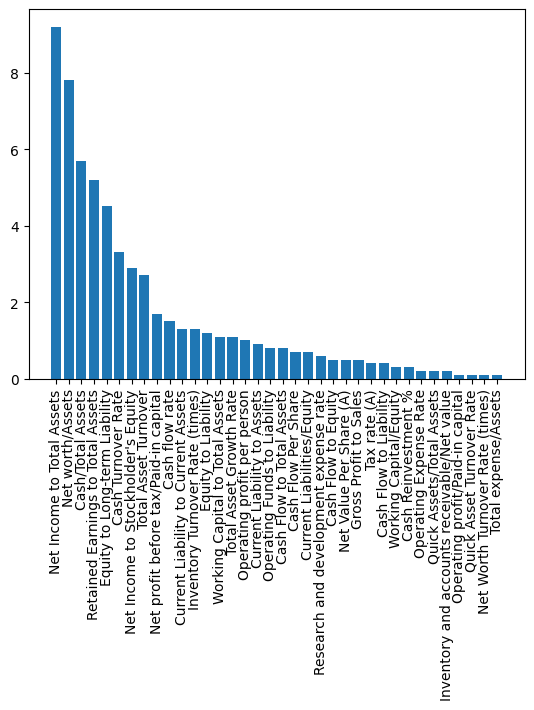

[('Net Income to Total Assets', 9.2), ('Net worth/Assets', 7.8), ('Cash/Total Assets', 5.7), ('Retained Earnings to Total Assets', 5.2), ('Equity to Long-term Liability', 4.5)]


In [60]:
from collections import defaultdict
feature_importance_all=defaultdict(int)
for x in feature_importance_list:
    for key in x.keys():
        feature_importance_all[key]+=x[key]
for x in feature_importance_all.keys():
    feature_importance_all[x]/=K_fold
feature_importance_all
# sorted feature importance
sorted_feature_importance = sorted(feature_importance_all.items(), key=lambda x: x[1], reverse=True)

# visualisation des features les plus importantes
import matplotlib.pyplot as plt
plt.bar([x[0] for x in sorted_feature_importance], [x[1] for x in sorted_feature_importance])
plt.xticks(rotation=90)
plt.show()
print(sorted_feature_importance[:5])

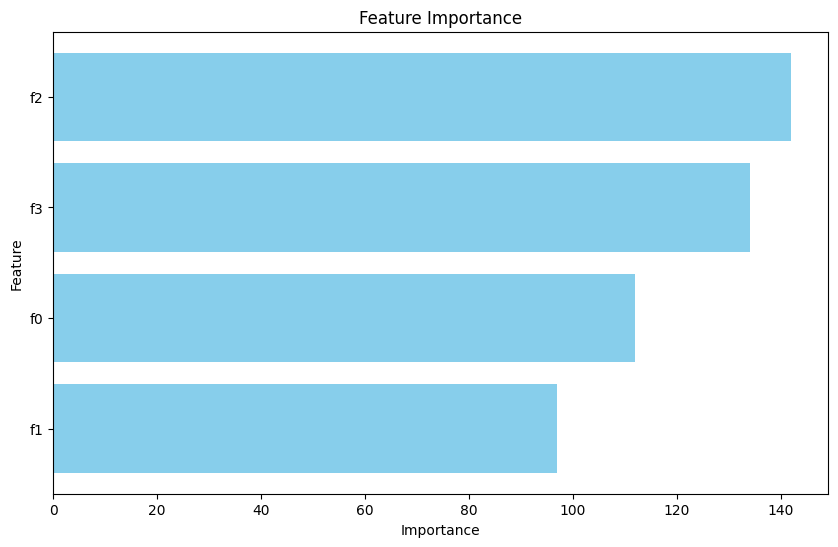

In [40]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(objective='multi:softprob', num_class=3)
model.fit(X_train, y_train)

# Get feature importance
importance = model.get_booster().get_score(importance_type='weight')
# Convert to DataFrame for easier visualization
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np
# Kfold with oversampling - SMOTE

K_fold = 10
skf = StratifiedKFold(n_splits=K_fold)


recall_list=[]
precision_list=[]
F_beta_2_list=[]
for train_indices,test_indices in skf.split(df_X, df_Y):
    df_X_train, df_X_test = df_X.iloc[train_indices], df_X.iloc[test_indices]
    df_Y_train, df_Y_test = df_Y.iloc[train_indices], df_Y.iloc[test_indices]
    # oversampling - SMOTE 
    # SMOTE - strategy = 1000 samples for the minority class
    strategy = { 1: 1000}
    sm = SMOTE(random_state=42,sampling_strategy=strategy)
    X_res, y_res = sm.fit_resample(df_X_train, df_Y_train)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_res, y_res)
    #####################################
        # evaluation sur un fold (qui peut être généralisé sur un train-test split classique)
    #####################################
    y_pred = model.predict(df_X_test)
    precision=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[0][1]
    recall=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[1][1]
    F_beta_2=precision_recall_fscore_support(df_Y_test, y_pred,beta=1.5)[2][1]
    
    recall_list.append(recall)
    precision_list.append(precision)
    F_beta_2_list.append(F_beta_2)

    
# Résultat de la cross validation / regression logistique avec un oversampling SMOTE
print("recall",np.mean(recall_list))
print("precision",np.mean(precision_list))
print("F_beta_2",np.mean(F_beta_2_list)) 

recall 0.5363636363636364
precision 0.3517727331505799
F_beta_2 0.44555490459180785


In [ ]:
#import sweetviz as sv
#analyze_report = sv.analyze(pd.concat([df_X,df_Y],axis=1))
#analyze_report.show_html('report_removeIQR007_normalized_0_9_corre_removed.html', open_browser=False)


In [ ]:
# avoir la meme métrique d'évaluation pour tous les modèles



In [ ]:
# manuellement / à la main

# Operating Gross Margin 
# remove 2 smallest values and 1 biggest value


# Remove outliers


# How ? / redefine the strategy

# remove heavily correlated 